In [7]:
#TASK- CIFAR10 dataset in CNN
!pip install keras tensorflow
!pip install numpy
!pip install matplotlib

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [11]:
def create_cnn_model():
    """
    Create a CNN model for CIFAR-10 classification
    """
    model = Sequential()
    
    # First Convolutional Block
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    # Second Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    # Third Convolutional Block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create and display model summary
cnn_model = create_cnn_model()
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 849,066 (3.24 MB)

 Trainable params: 847,402 (3.23 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [12]:
# Train the CNN model
history = cnn_model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 105ms/step - accuracy: 0.3982 - loss: 1.7521 - val_accuracy: 0.5131 - val_loss: 1.3442
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.5871 - loss: 1.1657 - val_accuracy: 0.5582 - val_loss: 1.2781
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 109ms/step - accuracy: 0.6629 - loss: 0.9585 - val_accuracy: 0.7267 - val_loss: 0.7790
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 121ms/step - accuracy: 0.7090 - loss: 0.8412 - val_accuracy: 0.7248 - val_loss: 0.7895
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.7413 - loss: 0.7549 - val_accuracy: 0.7698 - val_loss: 0.6628
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 151s 122ms/step - accuracy: 0.7674 - loss: 0.6874 - val_accuracy: 0.7799 - val_loss: 0.6372
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.7844 - loss: 0.6357 - val_accuracy: 0.7823 - val_loss: 0.6436
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.7997 - loss: 

In [13]:
def predict_image_cnn(image_path, model):
    """
    Predict the class of an input image using the trained CNN model
    
    Args:
        image_path: Path to the image file
        model: Trained CNN model
    
    Returns:
        Predicted class name and confidence
    """
    # Load and preprocess the image
    img = Image.open(image_path)
    
    # Resize to 32x32 (CIFAR-10 input size)
    img = img.resize((32, 32))
    
    # Convert to numpy array and normalize
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    
    # If image is grayscale, convert to RGB
    if len(img_array.shape) == 2:
        img_array = np.stack([img_array]*3, axis=-1)
    # If image has alpha channel, remove it
    elif img_array.shape[2] == 4:
        img_array = img_array[:, :, :3]
    
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    # Make prediction
    predictions = model.predict(img_array, verbose=0)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])
    
    # Get top 3 predictions
    top_3_indices = np.argsort(predictions[0])[-3:][::-1]
    top_3_classes = [class_names[i] for i in top_3_indices]
    top_3_confidences = [predictions[0][i] for i in top_3_indices]
    
    # Display the image with predictions
    plt.figure(figsize=(10, 5))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f'Predicted: {class_names[predicted_class]}\nConfidence: {confidence:.4f}')
    plt.axis('off')
    
    # Confidence bar chart
    plt.subplot(1, 2, 2)
    y_pos = np.arange(len(class_names))
    plt.barh(y_pos, predictions[0], align='center', alpha=0.7)
    plt.yticks(y_pos, class_names)
    plt.xlabel('Confidence')
    plt.title('Class Probabilities')
    plt.tight_layout()
    plt.show()
    
    print(f"🎯 Top Prediction: {class_names[predicted_class]} (Confidence: {confidence:.4f})")
    print("\n📊 Top 3 Predictions:")
    for i, (cls, conf) in enumerate(zip(top_3_classes, top_3_confidences)):
        print(f"   {i+1}. {cls}: {conf:.4f}")
    
    return class_names[predicted_class], confidence

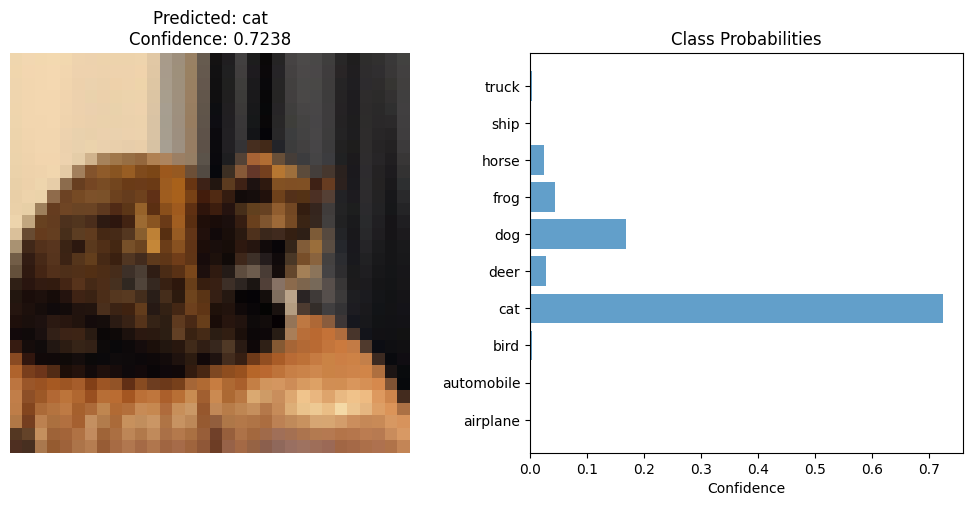

🎯 Top Prediction: cat (Confidence: 0.7238)

📊 Top 3 Predictions:
   1. cat: 0.7238
   2. dog: 0.1690
   3. frog: 0.0437

🎉 Final Result:
Image: cat.jpg
Predicted Class: cat
Confidence Score: 0.7238


In [14]:
image_path = "cat.jpg"
predicted_class, confidence = predict_image_cnn(image_path, cnn_model)

print(f"\n🎉 Final Result:")
print(f"Image: {image_path}")
print(f"Predicted Class: {predicted_class}")
print(f"Confidence Score: {confidence:.4f}")